# The Central Limit Theorem

The <a href="https://en.wikipedia.org/wiki/Central_limit_theorem" target="_blank">central limit theorem (CLT)</a> is one of the most powerful and consequential results from probability theory. Simple put, the CLT states that the sum of _n_ samples drawn from some probability distribution with mean _m_ and standard deviation _s_ can be approximated by the normal distribution <i>N</i>(_nm_, _ns_). 

This result is consequential as it explains why the normal distribution dominates in probability and statistics, as well as in data analytics. The vast majority of measurements can be accurately modelled using the normal distribution. If this were not true, statisticians and data scientists would have a much harder time trying to quantify the measurement errors in their data.

In this post we show that by iteratively sampling from the <a href="https://en.wikipedia.org/wiki/Exponential_distribution" target="_blank">exponential distribution</a>, the resulting sum is approximately that of the normal distribution.

## Python Code

The function `sum_from_exp_distribution` samples `n_rows` of data from the exponential distribution `n_iter` times. By increasing the value of `n_iter`, we increase the number of times we sample and sum from the exponential distribution.

The function `analytical_solution` calculates the theoretical normal distribution curve for a specified number of sampling iterations `n_iter`. `n_iter1` affects the shape of the normal distribution as the variance of a normal distribution depends on the number of times the sample are drawn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

pi = np.pi

def sum_from_exp_distribution(n_rows, n_iters):   
    # Iteratively sample n_rows of data from the exponential distribution n_iter times.
    R = np.zeros(n_rows)
    
    for i in range(n_iters):
        R = R + np.random.exponential(1.0, 10000)
    
    # Don't forget to normalize by the total number of iterations.
    R = R / n_iters
    return R

def analytical_solution(n_iters):
    # Calculate the analytical normal distribution.
    x = np.linspace(0, 4, 1000)
    
    # Analytical mean of the normal distribution is simply 1.
    mu = 1 ** -1  
    
    # Variance depends on the number of times the samples were drawn!
    sig2 = 1.0 / (n_iters * 1 ** 2)  
    p = ((2 * pi * sig2) ** -0.5) * np.exp(-(x - mu) ** 2 / 2 / sig2)
    
    return x, p

When only 5 sampling iterations are performed for 10000 samples from the exponential distribution, the resulting sum does not quite yet follow the normal distribution.

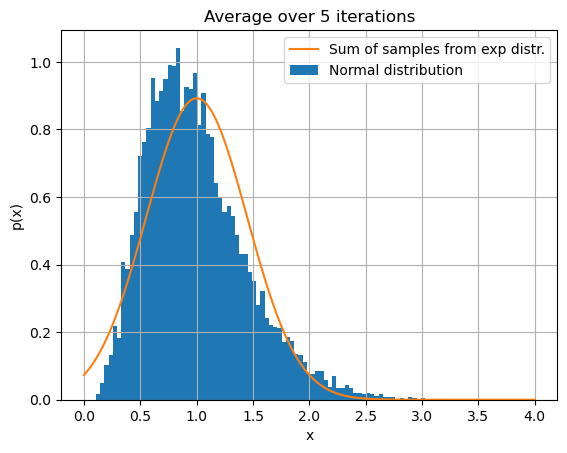

In [2]:
n_rows = 10000
n_iters = 5

R = sum_from_exp_distribution(n_rows, n_iters)
x, p = analytical_solution(n_iters)

plt.title("Average over {} iterations".format(n_iters))
plt.hist(R, 100, density = True)
plt.plot(x, p)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("p(x)")
plt.legend(["Sum of samples from exp distr.", "Normal distribution"])
plt.show()

After 10 sampling iterations are performed for 10000 samples from the exponential distribution, the resulting sum is now much closer to the normal distribution.

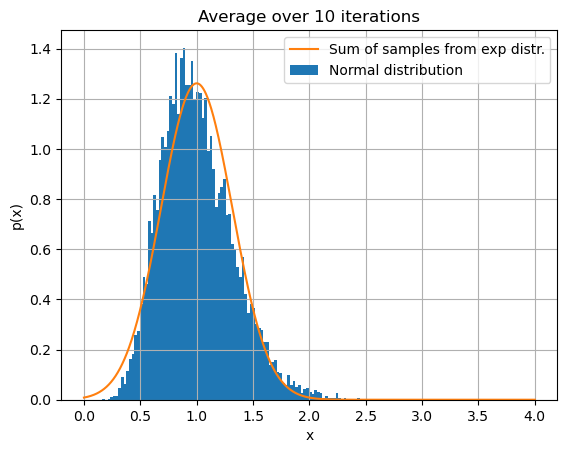

In [3]:
n_rows = 10000
n_iters = 10

R = sum_from_exp_distribution(n_rows, n_iters)
x, p = analytical_solution(n_iters)

plt.title("Average over {} iterations".format(n_iters))
plt.hist(R, 100, density = True)
plt.plot(x, p)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("p(x)")
plt.legend(["Sum of samples from exp distr.", "Normal distribution"])
plt.show()

Finally, after 50 sampling iterations are performed for 10000 samples from the exponential distribution, the resulting sum approximates the normal distribution very well.

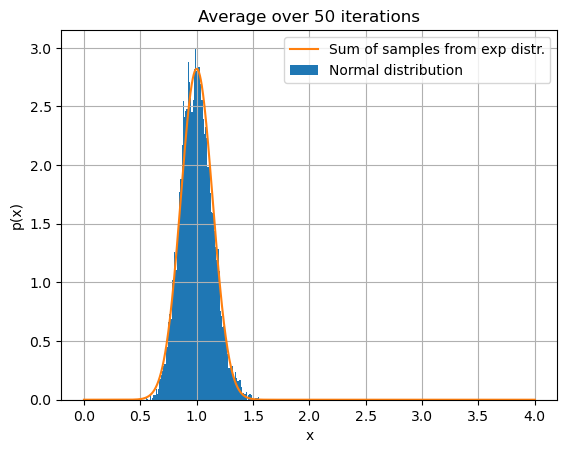

In [4]:
n_rows = 10000
n_iters = 50

R = sum_from_exp_distribution(n_rows, n_iters)
x, p = analytical_solution(n_iters)

plt.title("Average over {} iterations".format(n_iters))
plt.hist(R, 100, density = True)
plt.plot(x, p)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("p(x)")
plt.legend(["Sum of samples from exp distr.", "Normal distribution"])
plt.show()

While this post explores only the exponential distribution, sampling from other distributions such as the uniform distribution or skewed distributions also lead to the normal distribution. However, the distributions sampled from must have finite variance and mean. This means that sampling from the <a href="https://en.wikipedia.org/wiki/Pareto_distribution" target="_blank">Pareto distribution</a> will not lead to the normal distribution.

***

## References

* <a href="Think Stats Probability and Statistics for Programmers" target="_blank">Think Stats Probability and Statistics for Programmers, Allen Downey</a>